In [3]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

### 1. data to dataframe

In [4]:
transaction_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','Transactions')

In [5]:
transaction_df.columns=transaction_df.iloc[0]

In [6]:
transaction_df.drop(index=transaction_df.index[0],axis=0, inplace=True)

In [7]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [8]:
transaction_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [9]:
data_types = {
    'transaction_id': "int",
    'product_id': "int",
    'customer_id': "int",
    'transaction_date': 'datetime64[ns]',
    'list_price': 'float',
    'standard_cost': 'float',
    'product_first_sold_date': 'datetime64[ns]'
}

In [10]:
transaction_df = transaction_df.astype(data_types)

### 2. data cleaning

In [11]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [12]:
# transaction_df.describe().transpose()

In [13]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226


### 2.1 missing value

In [14]:
transaction_df = transaction_df.replace(" ",np.NaN)
transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [15]:
for col in transaction_df.columns:
  
    if transaction_df[col].dtype == "object":
        mode= transaction_df[col].mode()[0] 
        transaction_df[col] = transaction_df[col].fillna(mode)

    elif transaction_df[col].dtype == 'int32' or transaction_df[col].dtype == 'float64':
        mean = transaction_df[col].mean()
        transaction_df[col] = transaction_df[col].fillna(mean)

In [16]:
transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date    197
dtype: int64

### 3. cohort analysis

#### 3.1 get transaction month (month happens that transaction)and cohort month(month happens the first transaction)

In [17]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [18]:
transaction_df['TransactionMonth']=transaction_df["transaction_date"].apply(get_month)

##CohortMonth is the the same customer's earliest transaction month
transaction_df['CohortMonth'] = transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

In [19]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,2017-02-01,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,2017-05-01,2017-01-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,2017-10-01,2017-01-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,2017-08-01,2017-02-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,2017-10-01,2017-01-01


In [20]:
transaction_df.dtypes

0
transaction_id                      int32
product_id                          int32
customer_id                         int32
transaction_date           datetime64[ns]
online_order                         bool
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
TransactionMonth           datetime64[ns]
CohortMonth                datetime64[ns]
dtype: object

#### 3.2 get cohort index

In [21]:
transaction_df["CohortIndex"]=(transaction_df["TransactionMonth"].dt.year-transaction_df["CohortMonth"].dt.year)*12+(transaction_df["TransactionMonth"].dt.month-transaction_df["CohortMonth"].dt.month)+1

In [22]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,2017-10-01,2017-01-01,10


#### 3.3 get cohort data

In [23]:
cohort_data=transaction_df.groupby(["CohortMonth","CohortIndex"])['customer_id'].nunique()

In [24]:
cohort_data

CohortMonth  CohortIndex
2017-01-01   1              1354
             2               486
             3               508
             4               509
             5               502
                            ... 
2017-10-01   2                 6
             3                 8
2017-11-01   1                13
             2                 5
2017-12-01   1                 4
Name: customer_id, Length: 78, dtype: int64

### 3.4 get dataframe(cohort month ,cohort index, cohort data)

In [25]:
cohort_df = cohort_data.reset_index()

In [26]:
cohort_df.rename(columns={"customer_id":"customer_number"},inplace=True)

In [27]:
cohort_df

,CohortMonth,CohortIndex,customer_number
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502
...,...,...,...
73,2017-10-01,2,6
74,2017-10-01,3,8
75,2017-11-01,1,13
76,2017-11-01,2,5


#### 3.5 retention rate

In [28]:
cohort_df=cohort_df.pivot_table(index="CohortMonth",columns="CohortIndex",values="customer_number")

In [29]:
cohort_df

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
cohort_sizes=cohort_df.iloc[:,0]
retention=np.round(cohort_df.divide(cohort_sizes,axis=0)*100,2)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.89,37.52,37.59,37.08,35.67,38.26,39.07,36.93,39.22,36.71,38.11
2017-02-01,100.0,40.62,37.25,39.12,36.00,37.25,38.50,35.12,41.12,38.50,37.00,NaN
2017-03-01,100.0,34.50,35.95,34.50,37.60,38.02,35.54,43.80,39.05,37.40,NaN,NaN
2017-04-01,100.0,33.04,36.01,45.54,42.56,36.01,42.26,37.50,39.29,NaN,NaN,NaN
2017-05-01,100.0,40.48,38.57,41.43,33.81,35.24,34.76,38.57,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.89,36.07,38.52,37.70,37.70,43.44,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.77,37.66,41.56,48.05,31.17,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.25,41.18,33.33,25.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.43,30.43,39.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
retention.index = pd.to_datetime(retention.index)
retention.index = retention.index.strftime('%Y-%m')
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01,100.0,35.89,37.52,37.59,37.08,35.67,38.26,39.07,36.93,39.22,36.71,38.11
2017-02,100.0,40.62,37.25,39.12,36.00,37.25,38.50,35.12,41.12,38.50,37.00,NaN
2017-03,100.0,34.50,35.95,34.50,37.60,38.02,35.54,43.80,39.05,37.40,NaN,NaN
2017-04,100.0,33.04,36.01,45.54,42.56,36.01,42.26,37.50,39.29,NaN,NaN,NaN
2017-05,100.0,40.48,38.57,41.43,33.81,35.24,34.76,38.57,NaN,NaN,NaN,NaN
2017-06,100.0,36.89,36.07,38.52,37.70,37.70,43.44,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.77,37.66,41.56,48.05,31.17,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,37.25,41.18,33.33,25.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.43,30.43,39.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.6 plot heat map

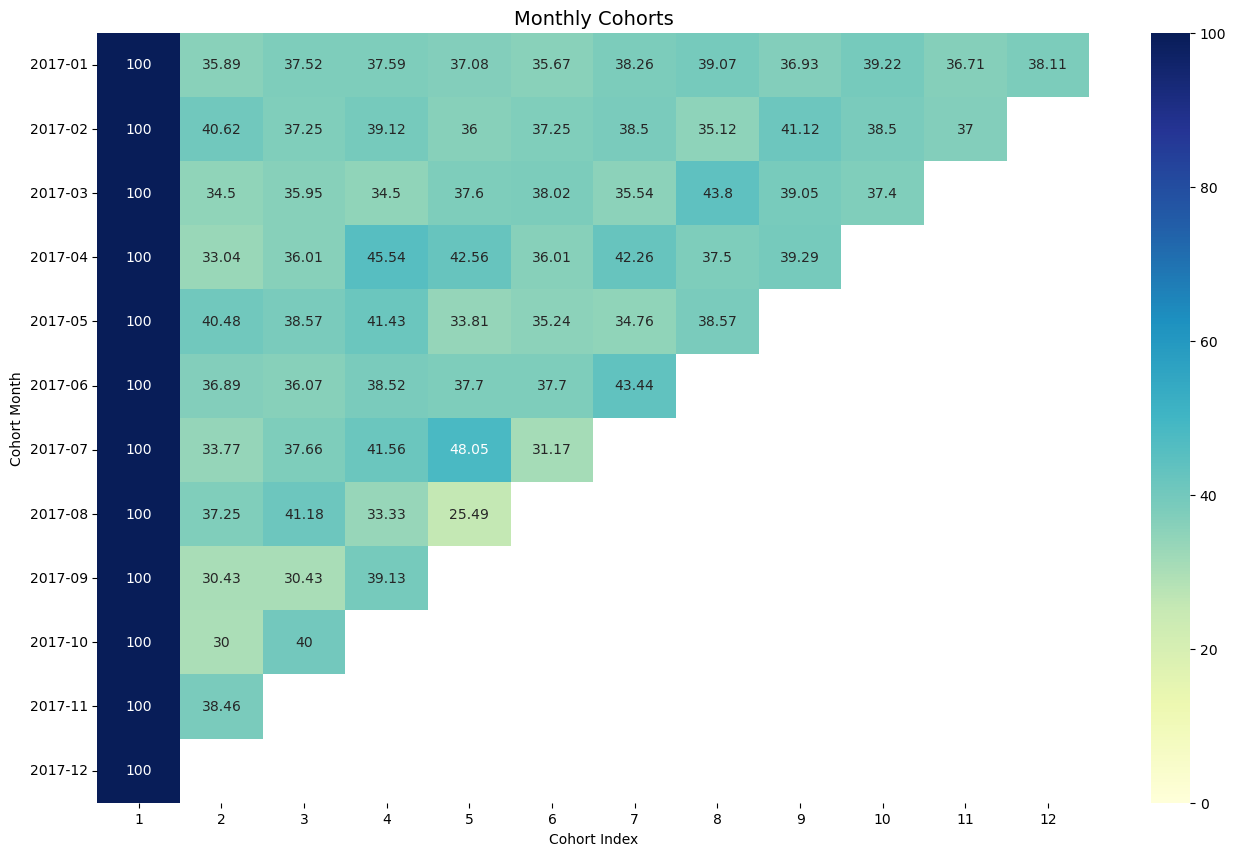

In [32]:
plt.figure(figsize=(16,10))
plt.title("Monthly Cohorts", fontsize=14)
sns.heatmap(retention, annot=True, vmin=0,vmax=100,cmap="YlGnBu",fmt='g')
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Index")
plt.yticks(rotation=360)
plt.show()

In [33]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  19803 n

### RFM model

In [34]:
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,2017-10-01,2017-01-01,10


In [36]:
transaction_df["revenue"]=transaction_df["list_price"]-transaction_df["standard_cost"]

In [37]:
transaction_df_approved = transaction_df[transaction_df["order_status"] == "Approved"]
transaction_df_approved.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19821 entries, 1 to 20000
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19821 non-null  int32         
 1   product_id               19821 non-null  int32         
 2   customer_id              19821 non-null  int32         
 3   transaction_date         19821 non-null  datetime64[ns]
 4   online_order             19821 non-null  bool          
 5   order_status             19821 non-null  object        
 6   brand                    19821 non-null  object        
 7   product_line             19821 non-null  object        
 8   product_class            19821 non-null  object        
 9   product_size             19821 non-null  object        
 10  list_price               19821 non-null  float64       
 11  standard_cost            19821 non-null  float64       
 12  product_first_sold_date  19625 non-nu

In [38]:
transaction_df_approved["transaction_date"].max()

Timestamp('2017-12-30 00:00:00')

In [39]:
today_date=pd.to_datetime("2018-01-01")

#### 1. get recency:today-transaction date; 
#### 2. frequency: after grouping by customer_id, count(transaction_id);
####  3. get monentary: sum revenue after grouping by customer_id

In [40]:
df_rfm=transaction_df_approved[["transaction_id","customer_id","transaction_date","revenue"]]
df_rfm

,transaction_id,customer_id,transaction_date,revenue
1,1,2950,2017-02-25,17.87
2,2,3120,2017-05-21,1702.55
3,3,402,2017-10-16,1544.61
4,4,3135,2017-08-31,817.36
5,5,787,2017-10-01,1055.82
...,...,...,...,...
19996,19996,1018,2017-06-24,802.26
19997,19997,127,2017-11-09,104.24
19998,19998,2284,2017-04-14,1592.19
19999,19999,2764,2017-07-03,91.15


In [41]:
df2_rfm=df_rfm.groupby("customer_id").agg({
 "transaction_date":lambda x:(today_date-x.max()).days,
   "transaction_id":"count",
    "revenue":"sum"
})

In [42]:
df2_rfm_renamed=df2_rfm.rename(
    columns={
    "transaction_date":"recency",
    "transaction_id":"frenquecy",
    "revenue":"monetary"
    },
)
df2_rfm_renamed

,recency,frenquecy,monetary
customer_id,,,
1,9,11,3018.090000
2,130,3,2226.260000
3,104,8,3362.810000
4,197,2,220.570000
5,18,6,2394.940000
...,...,...,...
3497,54,3,1648.320000
3498,129,6,3147.330000
3499,53,7,4955.250000


In [43]:
r=pd.qcut(df2_rfm_renamed["recency"],q=5,labels=range(5,0,-1)) # transction date 距今多少天，越小越frequency
f=pd.qcut(df2_rfm_renamed["frenquecy"],q=5,labels=range(1,6))     
m=pd.qcut(df2_rfm_renamed["monetary"],q=5,labels=range(1,6))

rfm_ranking=pd.concat([r, f, m], axis=1)
rfm_ranking.columns=["r_ranking", "f_ranking", "m_ranking"]
rfm_ranking["total_ranking"]=rfm_ranking.sum(axis=1)
rfm_ranking

,r_ranking,f_ranking,m_ranking,total_ranking
customer_id,,,,
1,5,5,3,13
2,1,1,2,4
3,1,4,4,9
4,1,1,1,3
5,4,3,2,9
...,...,...,...,...
3497,3,1,2,6
3498,1,3,3,7
3499,3,4,5,12


In [44]:
# rfm_ranking
# rfm_ranking["total_ranking"].value_counts()
sorted(rfm_ranking["total_ranking"].unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [45]:
def assign_rfm_label(ranking):
    if ranking>10:
        return 'High Value'
    elif ranking>=5:
        return 'Medium Value'
    else:
        return 'Low Value'

In [46]:
rfm_ranking["RFM_label"]=rfm_ranking["total_ranking"].apply(assign_rfm_label)

In [48]:
rfm_ranking.reset_index(inplace=True)

In [49]:
rfm_ranking

,customer_id,r_ranking,f_ranking,m_ranking,total_ranking,RFM_label
0,1,5,5,3,13,High Value
1,2,1,1,2,4,Low Value
2,3,1,4,4,9,Medium Value
3,4,1,1,1,3,Low Value
4,5,4,3,2,9,Medium Value
...,...,...,...,...,...,...
3488,3497,3,1,2,6,Medium Value
3489,3498,1,3,3,7,Medium Value
3490,3499,3,4,5,12,High Value
3491,3500,1,3,2,6,Medium Value


In [50]:
df = transaction_df.merge(rfm_ranking[['customer_id', 'RFM_label']], on='customer_id', how='left')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  19803 n

In [52]:
df[df["RFM_label"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex,revenue,RFM_label
6798,6799,83,287,2017-08-14,True,Cancelled,Solex,Touring,medium,large,2083.94,675.03,1970-01-01 00:00:00.000041533,2017-08-01,2017-08-01,1,1408.91,NaN


In [53]:
df.loc[df["RFM_label"].isnull(),'RFM_label']="Low Value"

In [54]:
df[df["RFM_label"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex,revenue,RFM_label


### EDA on all customer

### 1.deal with customer table

#### 1.merge customer-related tables

In [55]:
oldcustomer_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customer_address= pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

In [56]:
oldcustomer_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,124.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,124.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,124.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,124.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [57]:
customer_address.columns=customer_address.iloc[0]

In [58]:
customer_address.drop(index=customer_address.index[0],axis=0,inplace=True)

In [59]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [64]:
customer_address["state"].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [62]:
customer_address["state"]=customer_address["state"].replace("New South Wales","NSW")

In [63]:
customer_address["state"]=customer_address["state"].replace("Victoria","VIC")

In [65]:
oldcustomer_df=oldcustomer_df.merge(customer_address, on="customer_id", how="left")

In [66]:
oldcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   object 
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [548]:
oldcustomer_df[oldcustomer_df["address"].isnull()]

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
94,3,Arlin Dearle,Male,61,1954-01-20 00:00:00,70.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
675,22,Deeanne Durtnell,Female,79,1962-12-10 00:00:00,61.0,NaN,IT,Mass Customer,N,No,11.0,NaN,NaN,NaN,NaN,NaN
3122,10,Fiorenze Birdall,Female,49,1988-10-11 00:00:00,35.0,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,NaN,NaN,NaN,NaN,NaN
3500,23,Olav Polak,Male,43,1995-02-10 00:00:00,29.0,NaN,NaN,High Net Worth,N,Yes,1.0,NaN,NaN,NaN,NaN,NaN


In [67]:
oldcustomer_df['DOB'] = pd.to_datetime(oldcustomer_df['DOB'])

In [68]:
oldcustomer_df['age'] = (pd.Timestamp('2018-01-01') - oldcustomer_df['DOB']).dt.days // 365

In [69]:
oldcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  3913 non-null   float64       
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

#### 2. deal with missing value

In [70]:
oldcustomer_df['age'].fillna(oldcustomer_df['age'].median(), inplace=True)
oldcustomer_df['tenure'].fillna(oldcustomer_df['tenure'].median(), inplace=True)

oldcustomer_df['job_title'].fillna('Missing', inplace=True)
oldcustomer_df['job_industry_category'].fillna('Missing', inplace=True)

oldcustomer_df['country'].fillna(oldcustomer_df["country"].mode()[0], inplace=True)
oldcustomer_df['state'].fillna(oldcustomer_df["state"].mode()[0], inplace=True)

In [71]:
oldcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int32         
 1   product_id               20000 non-null  int32         
 2   customer_id              20000 non-null  int32         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  19803 n

In [73]:
mask = oldcustomer_df['gender'] == 'U'
oldcustomer_df.loc[mask, 'gender'] = np.random.choice(['Female', 'Male'], size=mask.sum())

In [74]:
# oldcustomer_df.head()

### all customers EDA

In [75]:
oldcustomer_merged_df = oldcustomer_df.merge(rfm_ranking[['customer_id', 'RFM_label']], on='customer_id', how='left')

In [76]:
oldcustomer_merged_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,RFM_label
0,34,Jephthah Bachmann,Female,59,1843-12-21,174.0,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,High Value
1,144,Jory Barrabeale,Male,71,NaT,40.0,Environmental Tech,IT,Mass Customer,N,No,11.0,22 Oxford Junction,2315,NSW,Australia,3,High Value
2,168,Reggie Broggetti,Female,8,NaT,40.0,General Manager,IT,Affluent Customer,N,Yes,11.0,16 Golf View Center,3020,VIC,Australia,6,High Value
3,267,Edgar Buckler,Male,53,NaT,40.0,Missing,IT,High Net Worth,N,No,11.0,48 Arizona Drive,2768,NSW,Australia,10,Low Value
4,290,Giorgio Kevane,Male,42,NaT,40.0,Senior Sales Associate,IT,Mass Customer,N,No,11.0,6923 Tennessee Circle,2766,NSW,Australia,9,High Value


In [78]:
oldcustomer_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   name                                 4000 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   int64         
 4   DOB                                  3913 non-null   datetime64[ns]
 5   age                                  4000 non-null   float64       
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [79]:
# oldcustomer_merged_df['RFM_label'].fillna('No Label', inplace=True) # no transaction
oldcustomer_merged_df['RFM_label'].fillna('Low Value', inplace=True) #

In [80]:
bins = [0,18,35, 50, 65, 100] 
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']

In [81]:
oldcustomer_merged_df['age_group'] = pd.cut(oldcustomer_merged_df['age'], bins=bins, labels=labels, right=False)  # 左闭右开

In [82]:
oldcustomer_merged_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,RFM_label,age_group
0,34,Jephthah Bachmann,Female,59,1843-12-21,174.0,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005,QLD,Australia,8,High Value,NaN
1,144,Jory Barrabeale,Male,71,NaT,40.0,Environmental Tech,IT,Mass Customer,N,No,11.0,22 Oxford Junction,2315,NSW,Australia,3,High Value,36-50
2,168,Reggie Broggetti,Female,8,NaT,40.0,General Manager,IT,Affluent Customer,N,Yes,11.0,16 Golf View Center,3020,VIC,Australia,6,High Value,36-50
3,267,Edgar Buckler,Male,53,NaT,40.0,Missing,IT,High Net Worth,N,No,11.0,48 Arizona Drive,2768,NSW,Australia,10,Low Value,36-50
4,290,Giorgio Kevane,Male,42,NaT,40.0,Senior Sales Associate,IT,Mass Customer,N,No,11.0,6923 Tennessee Circle,2766,NSW,Australia,9,High Value,36-50


In [85]:
oldcustomer_merged_df['age_group'].isnull().value_counts()

age_group
False    3999
True        1
Name: count, dtype: int64

In [86]:
oldcustomer_merged_df = oldcustomer_merged_df.drop(oldcustomer_merged_df[oldcustomer_merged_df['age'] == 174].index)

In [87]:
mapping = {'High Value': 3, 'Medium Value': 2, 'Low Value': 1}
oldcustomer_merged_df['RFM_label'] = oldcustomer_merged_df['RFM_label'].replace(mapping)
oldcustomer_merged_df['RFM_label'] = oldcustomer_merged_df['RFM_label'].astype(int)

In [105]:
oldcustomer_merged_df

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,RFM_label,age_group,count
1,144,Jory Barrabeale,Male,71,NaT,40.0,Environmental Tech,IT,Mass Customer,N,No,11.0,22 Oxford Junction,2315,NSW,Australia,3,3,36-50,0
2,168,Reggie Broggetti,Female,8,NaT,40.0,General Manager,IT,Affluent Customer,N,Yes,11.0,16 Golf View Center,3020,VIC,Australia,6,3,36-50,0
3,267,Edgar Buckler,Male,53,NaT,40.0,Missing,IT,High Net Worth,N,No,11.0,48 Arizona Drive,2768,NSW,Australia,10,1,36-50,0
4,290,Giorgio Kevane,Male,42,NaT,40.0,Senior Sales Associate,IT,Mass Customer,N,No,11.0,6923 Tennessee Circle,2766,NSW,Australia,9,3,36-50,0
5,451,Marlow Flowerdew,Male,37,NaT,40.0,Quality Control Specialist,IT,High Net Worth,N,No,11.0,8385 Lien Drive,3192,VIC,Australia,10,2,36-50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2858,Benedicto Radki,Male,4,2002-01-09,15.0,Recruiting Manager,Missing,Mass Customer,N,Yes,1.0,0555 Tomscot Plaza,2044,NSW,Australia,10,2,0-18,0
3996,3173,Angelo,Male,55,2001-10-10,16.0,Computer Systems Analyst I,Health,Mass Customer,N,Yes,1.0,8 Erie Center,3690,VIC,Australia,2,3,0-18,0
3997,3435,Stevena Allcock,Female,80,2002-01-15,15.0,Senior Editor,Missing,Affluent Customer,N,No,1.0,400 Petterle Crossing,4301,QLD,Australia,3,2,0-18,0
3998,3949,Costa Sleightholm,Male,24,2001-12-19,16.0,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0,28 Toban Center,3756,VIC,Australia,2,1,0-18,0


<Axes: xlabel='gender', ylabel='count'>

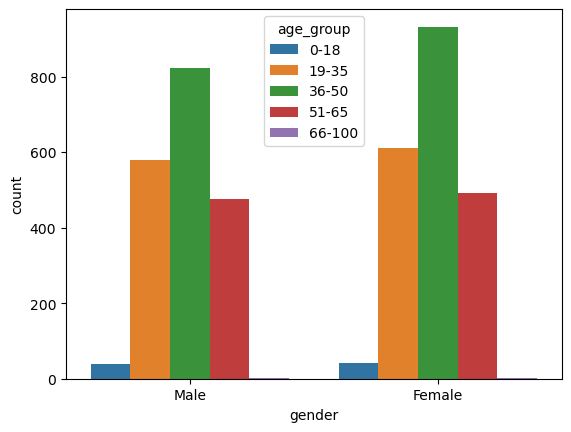

In [104]:
sns.countplot(x='gender',data=oldcustomer_merged_df,hue="age_group")

<module 'matplotlib.pyplot' from 'C:\\Users\\keden\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

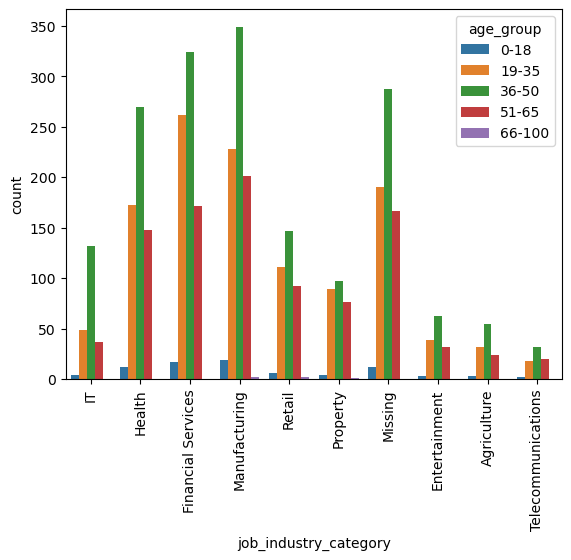

In [115]:
sns.countplot(x="job_industry_category",data=oldcustomer_merged_df, hue="age_group")
plt.xticks(rotation=90)
plt

In [138]:
# sns.countplot(x='job_industry_category',data=oldcustomer_merged_df,hue="gender")
# plt.xticks(rotation=90)
# plt.show()

<Axes: xlabel='owns_car', ylabel='past_3_years_bike_related_purchases'>

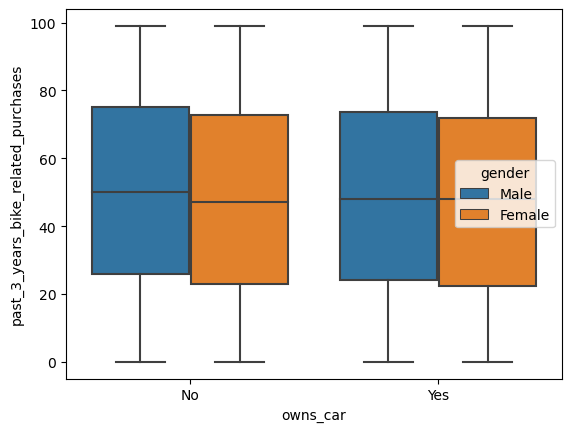

In [117]:
sns.boxplot(x='owns_car', y='past_3_years_bike_related_purchases', data=oldcustomer_merged_df,hue="gender")
# groupby

In [133]:
# df.info()
brand_purchases = df['brand'].value_counts()
df["count"]=0
rfm_distribution = df.groupby(['brand', 'RFM_label'])["count"].count().reset_index()
rfm_distribution.head()

,brand,RFM_label,count
0,Giant Bicycles,High Value,1489
1,Giant Bicycles,Low Value,241
2,Giant Bicycles,Medium Value,1582
3,Norco Bicycles,High Value,1258
4,Norco Bicycles,Low Value,228


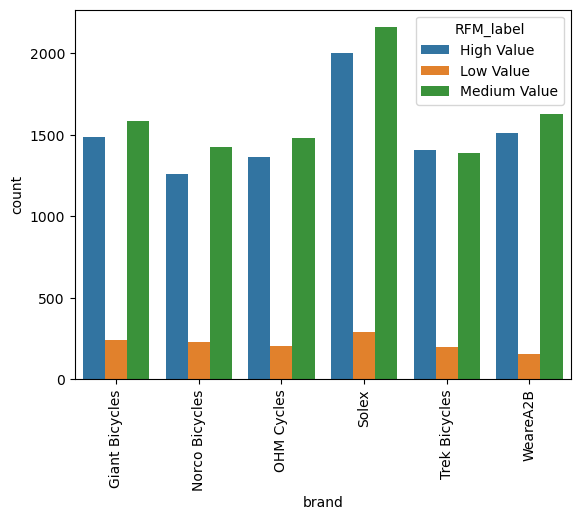

In [131]:
sns.barplot(x='brand', y="count",hue='RFM_label', data=rfm_distribution )
plt.xticks(rotation=90)
plt.show()

In [135]:
oldcustomer_merged_df.head(2)

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,RFM_label,age_group,count
1,144,Jory Barrabeale,Male,71,NaT,40.0,Environmental Tech,IT,Mass Customer,N,No,11.0,22 Oxford Junction,2315,NSW,Australia,3,3,36-50,0
2,168,Reggie Broggetti,Female,8,NaT,40.0,General Manager,IT,Affluent Customer,N,Yes,11.0,16 Golf View Center,3020,VIC,Australia,6,3,36-50,0


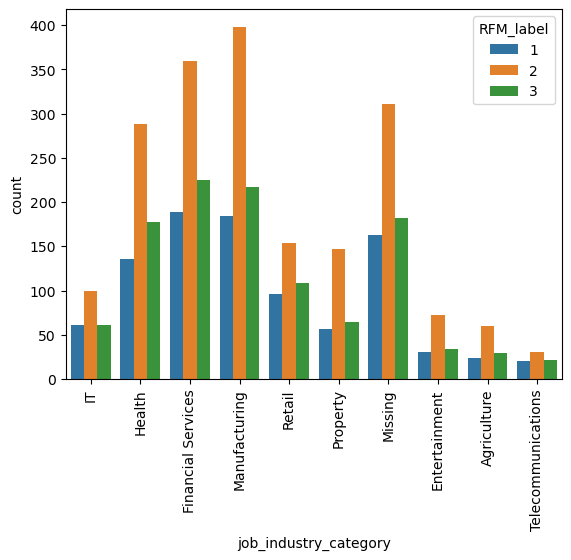

In [137]:
# sns.violinplot(x='job_industry_category', y='RFM_label', hue='gender', data=oldcustomer_merged_df, split=True)
# plt.xticks(rotation=90)
# plt.show()
# oldcustomer_merged_df["count"]=0
# data= df.groupby(['job', 'RFM_label'])["count"].count().reset_index()
# rfm_distribution 
sns.countplot(x='job_industry_category', hue='RFM_label', data=oldcustomer_merged_df)
plt.xticks(rotation=90)
plt.show()

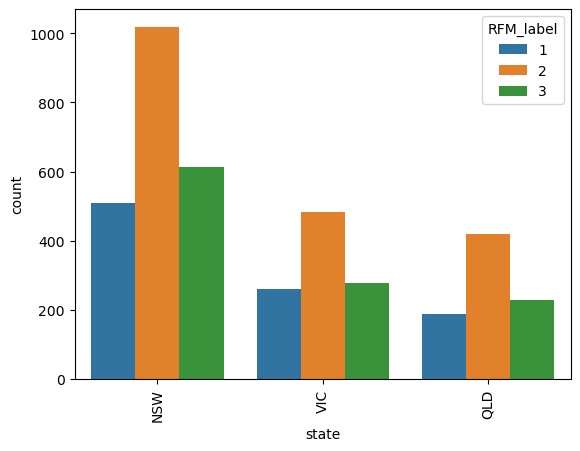

In [139]:
sns.countplot(x='state', hue='RFM_label', data=oldcustomer_merged_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\keden\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


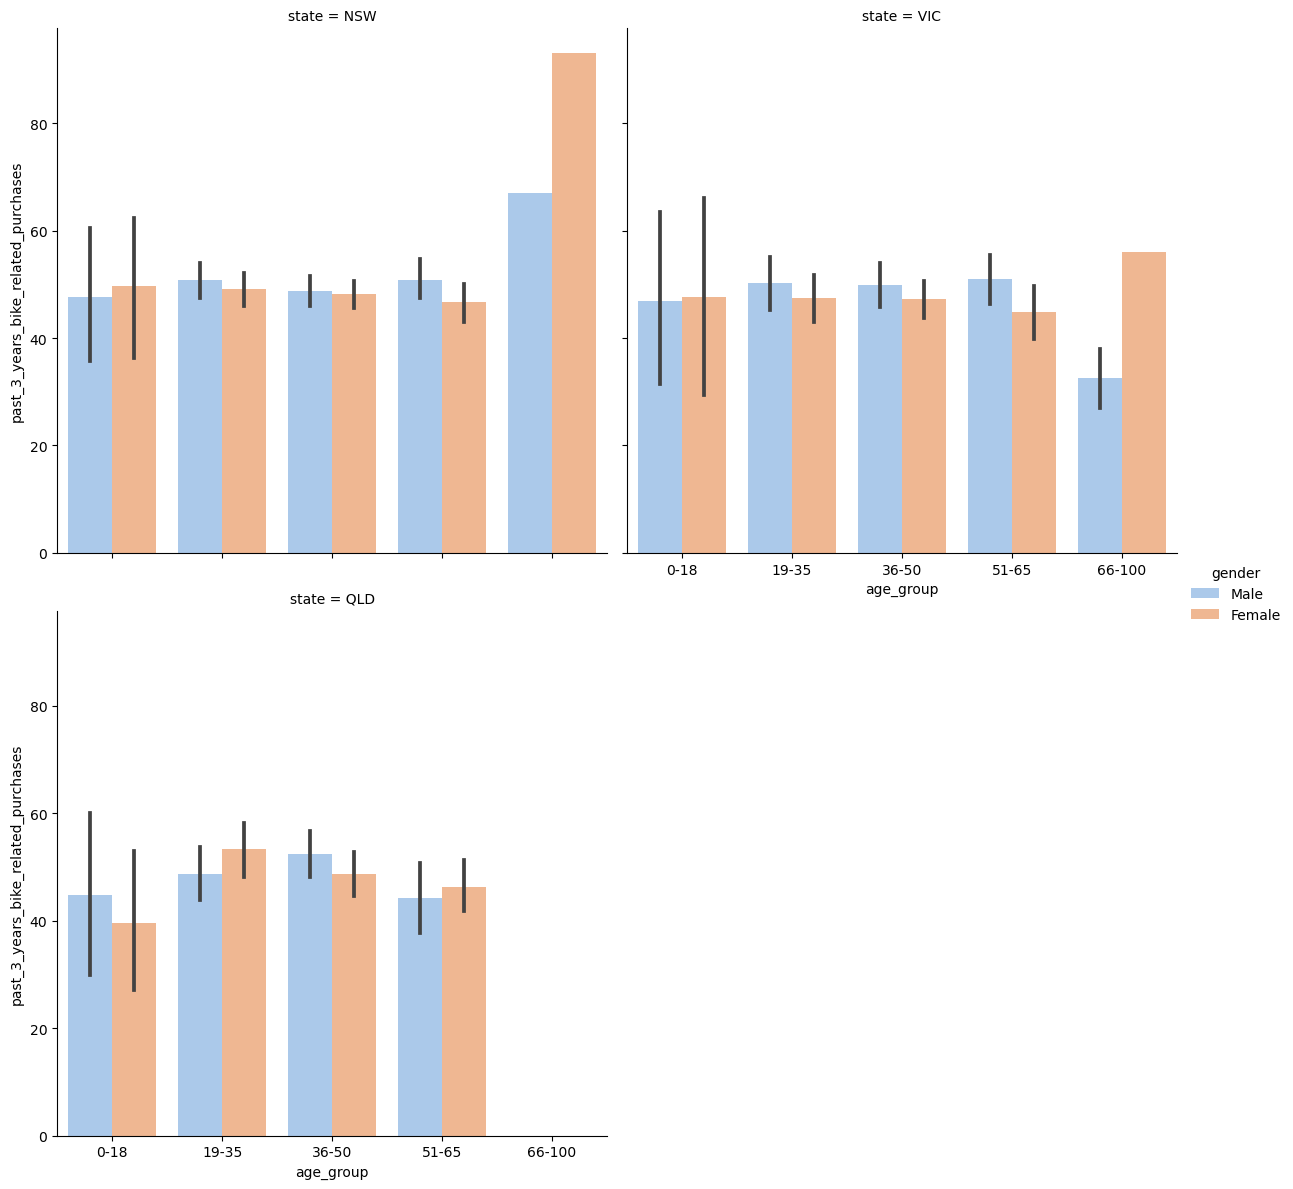

In [140]:
g = sns.catplot(
    data=oldcustomer_merged_df,
    x='age_group', y='past_3_years_bike_related_purchases',
    hue='gender',
    col='state',
    col_wrap=2,  
    kind='bar',
    height=6, 
    palette='pastel',
    legend=True
)

C:\Users\keden\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


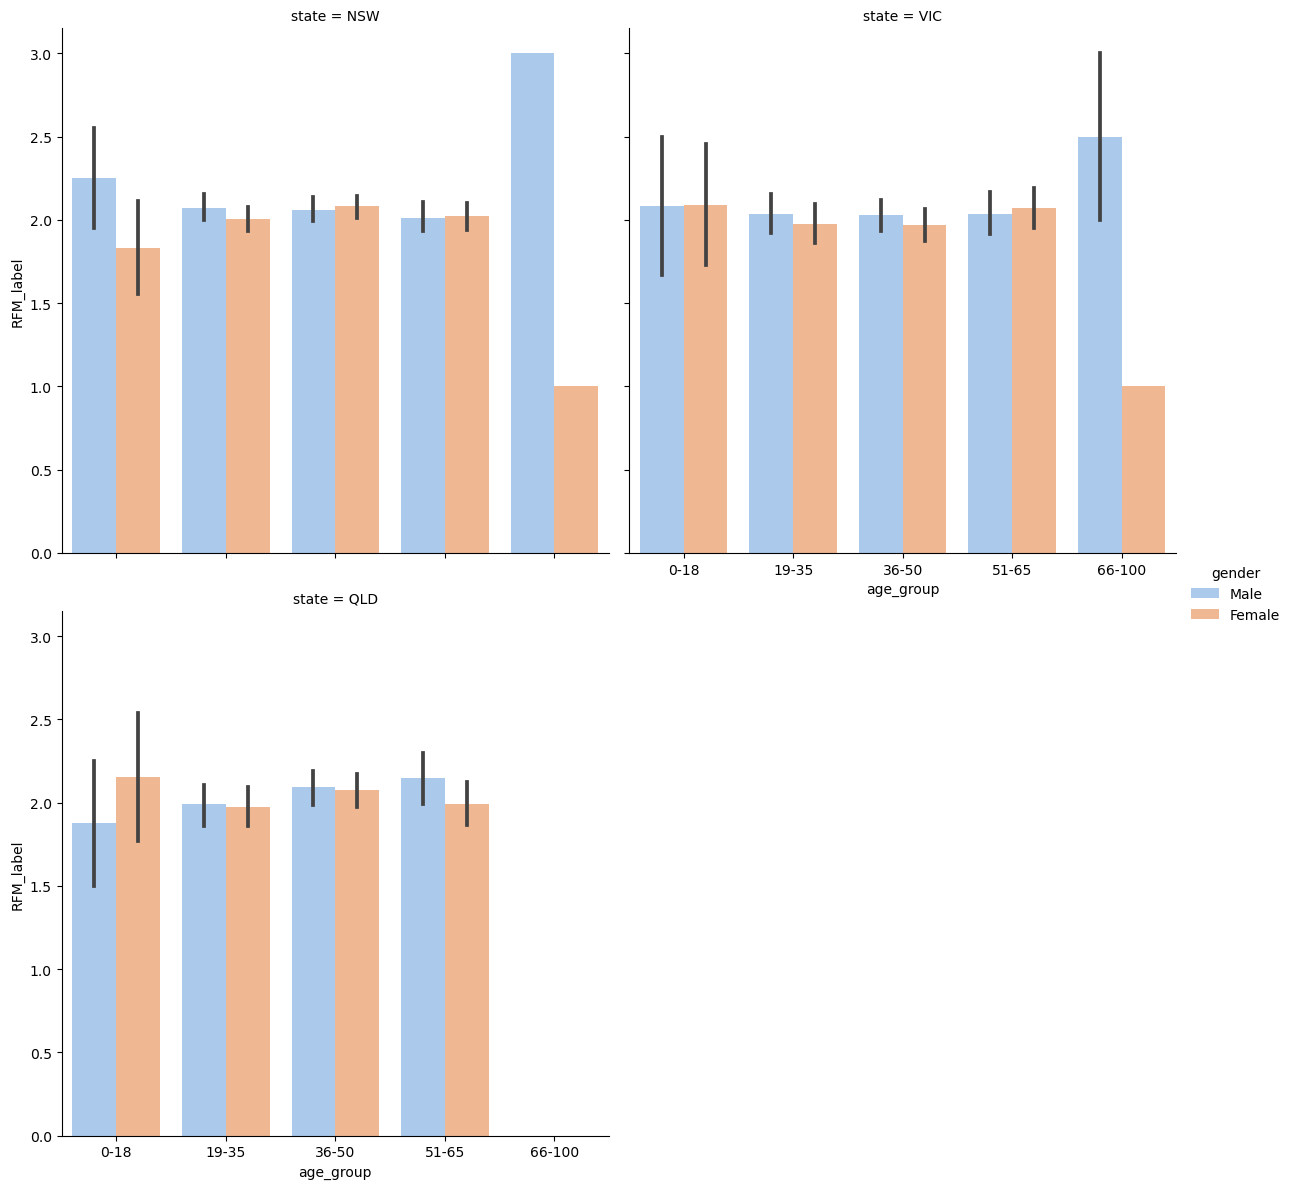

In [141]:
g = sns.catplot(
    data=oldcustomer_merged_df,
    x='age_group', y='RFM_label',
    hue='gender',
    col='state',
    col_wrap=2,  
    kind='bar',
    height=6, 
    palette='pastel',
    legend=True
)

In [142]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex,revenue,RFM_label,count
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,2017-02-01,2017-02-01,1,17.87,Low Value,0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,2017-05-01,2017-01-01,5,1702.55,High Value,0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,2017-10-01,2017-01-01,10,1544.61,High Value,0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,2017-08-01,2017-02-01,7,817.36,Medium Value,0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,2017-10-01,2017-01-01,10,1055.82,High Value,0


### find reasons of high customer churn in CohortIndex 5,6 with CohortMonth=7

In [143]:
cohort_index_5_ids = df[(df['CohortMonth'] == "2017-07-01") & (df['CohortIndex'] == 5)]['customer_id'].unique()
cohort_index_6_ids = df[(df['CohortMonth'] =="2017-07-01") & (df['CohortIndex'] == 6)]['customer_id'].unique()

In [145]:
print(cohort_index_5_ids)
print(cohort_index_6_ids)

[2730 2694 2514 1809 3172 2893 2945  635 1928 1038  188 1262 2075 3378
 2000 2855 1894 3049  119  899 1847 1128 1019  926 3395  726  916 1167
 1142 2460 2669 2263  581  437 3211 1516   45]
[1038 2215 3395 2694 1963 3149 1525  856 1128 1174 2389 3147 1903 1487
 2730 2611 3203 2075  188 2823 1167 1050 1809  926]


In [151]:
cohort_index_5_customer = oldcustomer_merged_df[oldcustomer_merged_df['customer_id'].isin(cohort_index_5_ids)]
cohort_index_6_customer = oldcustomer_merged_df[oldcustomer_merged_df['customer_id'].isin(cohort_index_6_ids)]
cohort_index_5_customer.head(2)

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,RFM_label,age_group,count
24,1038,Fraser Acome,Female,57,NaT,40.0,Engineer I,Manufacturing,Mass Customer,N,Yes,11.0,85 Laurel Trail,3809,VIC,Australia,6,2,36-50,0
43,2000,Kain Rene,Male,68,NaT,40.0,Assistant Professor,IT,High Net Worth,N,Yes,11.0,59170 Westridge Junction,2147,NSW,Australia,8,2,36-50,0


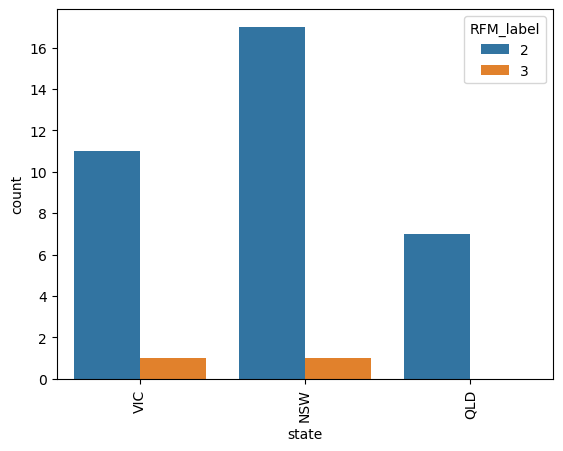

In [153]:
sns.countplot(x='state',data=cohort_index_5_customer,hue="RFM_label")
plt.show()

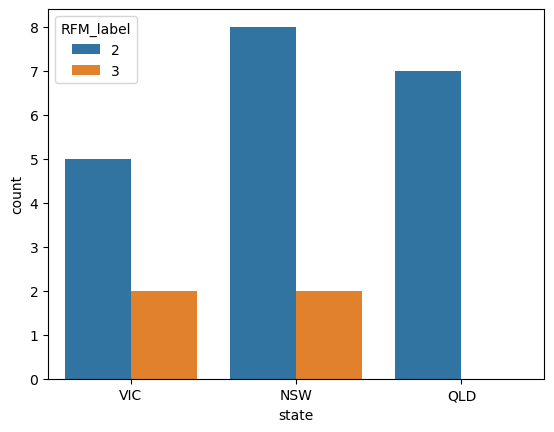

In [154]:
sns.countplot(x='state',data=cohort_index_6_customer,hue="RFM_label")
plt.show()

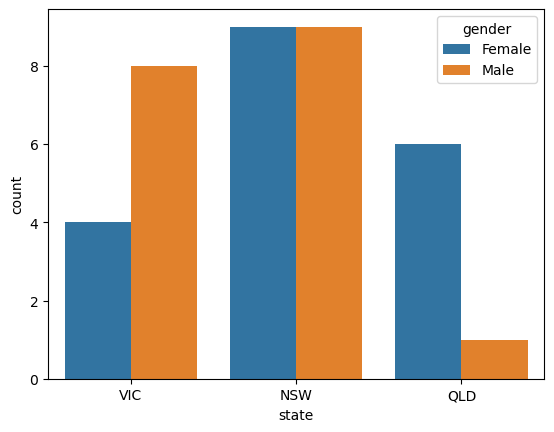

In [157]:
sns.countplot(x='state',data=cohort_index_5_customer,hue="gender")
plt.show()

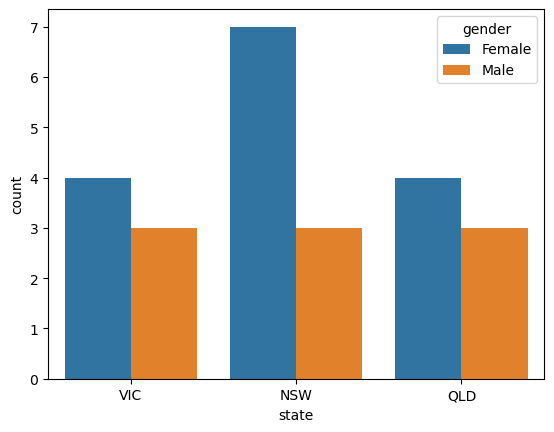

In [158]:
sns.countplot(x='state',data=cohort_index_6_customer,hue="gender")
plt.show()

<Axes: xlabel='state', ylabel='count'>

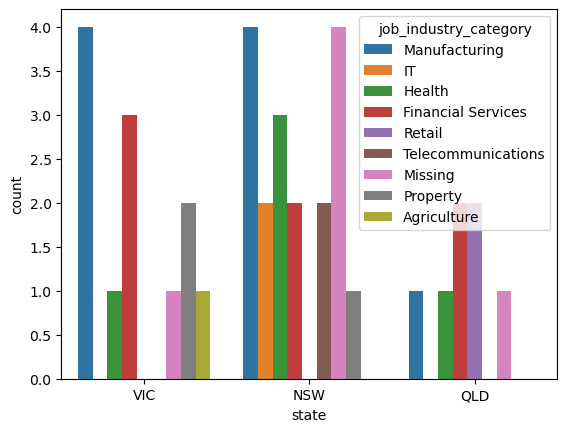

In [159]:
sns.countplot(x='state',data=cohort_index_5_customer,hue="job_industry_category")

<Axes: xlabel='state', ylabel='count'>

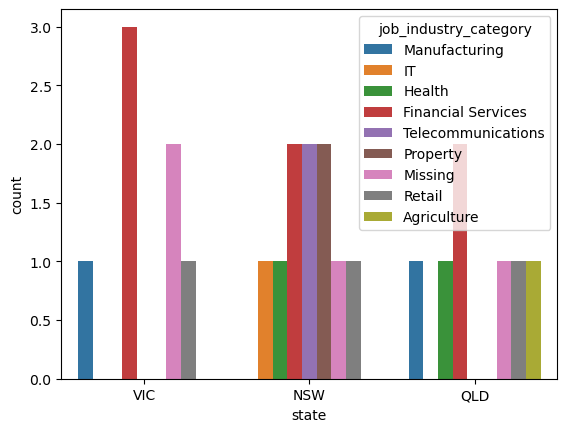

In [160]:
sns.countplot(x='state',data=cohort_index_6_customer,hue="job_industry_category")

In [195]:
brand_index_5_counts = df[(df['CohortMonth'] == "2017-07-01") & (df['CohortIndex'] == 5)]['brand'].value_counts().reset_index()
brand_index_5_counts["index"]="cohort_index5"
brand_index_5_counts 

,brand,count,index
0,Solex,10,cohort_index5
1,WeareA2B,9,cohort_index5
2,Trek Bicycles,9,cohort_index5
3,Giant Bicycles,9,cohort_index5
4,OHM Cycles,4,cohort_index5
5,Norco Bicycles,2,cohort_index5


In [196]:
brand_index_6_counts = df[(df['CohortMonth'] == "2017-07-01") & (df['CohortIndex'] == 6)]['brand'].value_counts().reset_index()
brand_index_6_counts["index"]="cohort_index6"
brand_index_6_counts 

,brand,count,index
0,WeareA2B,8,cohort_index6
1,OHM Cycles,8,cohort_index6
2,Solex,5,cohort_index6
3,Norco Bicycles,5,cohort_index6
4,Giant Bicycles,5,cohort_index6
5,Trek Bicycles,2,cohort_index6


In [198]:
brand_comparision=pd.concat([brand_index_5_counts,brand_index_6_counts])
brand_comparision

,brand,count,index
0,Solex,10,cohort_index5
1,WeareA2B,9,cohort_index5
2,Trek Bicycles,9,cohort_index5
3,Giant Bicycles,9,cohort_index5
4,OHM Cycles,4,cohort_index5
5,Norco Bicycles,2,cohort_index5
0,WeareA2B,8,cohort_index6
1,OHM Cycles,8,cohort_index6
2,Solex,5,cohort_index6
3,Norco Bicycles,5,cohort_index6


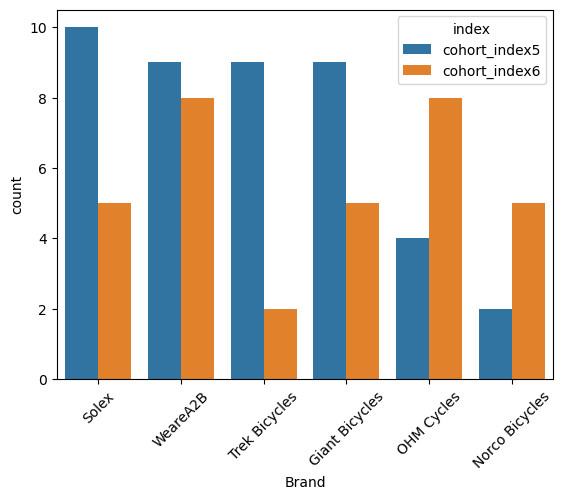

In [199]:
sns.barplot(x="brand",y="count",data=brand_comparision, hue="index")
plt.xlabel('Brand')
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# pie plot  ---RFM